In [25]:
%load_ext ipydex.displaytools

import sympy as sp
import numpy as np
import scipy.integrate as sc_integrate
import matplotlib.pyplot as plt


The ipydex.displaytools extension is already loaded. To reload it, use:
  %reload_ext ipydex.displaytools


In [26]:
theta1, theta2, theta3, theta4, theta5 = ttheta = sp.symbols("theta1:6")

In [27]:
def R(phi):
    """
    Rotationsmatrix in der Ebene
    """
    c = sp.cos(phi)
    s = sp.sin(phi)
       
    return  sp.Matrix([[c, -s], [s, c]])

In [28]:
R(theta1) # Rotationsmatirx

Matrix([
[cos(theta1), -sin(theta1)],
[sin(theta1),  cos(theta1)]])

In [29]:
# Einheitvektor in x-Richtung
ex = sp.Matrix([1, 0]) 

# Längen der Glieder
l1, l2, l3, l4 = 0.3, 0.6, 0.7, 0.9

# Basis 1 und 2
B1 = sp.Matrix([0, 0])
B2 = sp.Matrix([l4, 0])

G1 = B1 + R(theta1)*ex*l1
G2 = G1 + R(theta1 + theta2)*ex*l2

# Ende der offenen Kette
EE = G2 + R(theta1 + theta2 + theta3)*ex*l3

# Kettenschlussbedingung (2 skalare Gleichungen)
constraints = sp.Matrix([EE - B2]) ##:

constraints := Matrix([
[0.3*cos(theta1) + 0.6*cos(theta1 + theta2) + 0.7*cos(theta1 + theta2 + theta3) - 0.9],
[      0.3*sin(theta1) + 0.6*sin(theta1 + theta2) + 0.7*sin(theta1 + theta2 + theta3)]])

---

In [30]:
# Matrix aller Gelenke (kart. Koordinanten)
joints = sp.Matrix.hstack(B1, G1, G2, EE, B2) ##:

joints := Matrix([
[0, 0.3*cos(theta1), 0.3*cos(theta1) + 0.6*cos(theta1 + theta2), 0.3*cos(theta1) + 0.6*cos(theta1 + theta2) + 0.7*cos(theta1 + theta2 + theta3), 0.9],
[0, 0.3*sin(theta1), 0.3*sin(theta1) + 0.6*sin(theta1 + theta2), 0.3*sin(theta1) + 0.6*sin(theta1 + theta2) + 0.7*sin(theta1 + theta2 + theta3),   0]])

---

In [31]:

# Umwandeln in aufrufbare Funktionen
c_func = sp.lambdify(ttheta, constraints, modules="numpy") # constraints function
j_func = sp.lambdify(ttheta, joints, modules="numpy") # joints function

In [32]:
c_func(0, 0, 0, 0, 0)

array([[0.7],
       [0. ]])

In [33]:

# Zielfunktion für Minimierung, p: zu minimierende Variablen, theta1: parameter für Optimierung, in l.5 dann in dieser Reihenfogle
def target(p, theta1):    
    # Fehler-Vektor:
    err = c_func(theta1, p[0], p[1], p[2], p[3]) # constraints function
    return err[0]**2 + err[1]**2 # quadrat. Fehler
    

In [34]:
from scipy.optimize import fmin

In [35]:

# isolierter Test der Minimierung

# Startschätzung
ttheta0 = [0.25*np.pi, 0, 0, 0, 0] ##

res = fmin(target, x0=ttheta0[1:], args=(ttheta0[0], )) # x0... theta2 und theta3 optimiert, args ... theta 1 const.

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 182
         Function evaluations: 320


(-0.5, 1.4, -0.9, 0.4)

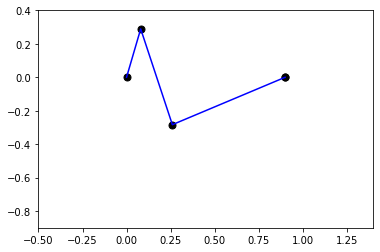

In [36]:

# isolierter Test des Plottens

theta1num = 1.3
res = fmin(target, x0=[0, 0, 0, 0], args=(theta1num,), disp=0)

# das wird ein array mit shape=(2, 5)
jc = joint_coords = j_func(theta1num, *res) # Gelenkkoordinaten

plt.plot(jc[0, :], jc[1, :], "ok", ms=7)
plt.plot(jc[0, :], jc[1, :], "b-")

# plt.axis("equal")
plt.axis([-0.5, 1.4, -0.9, 0.4])

In [37]:

# Interaktion zwischen Optimierung und Gleichungslösung

from ipywidgets import interact

@interact(theta1num=(0, 7, 0.2)) # (min, max, step)
def plot_func(theta1num):
    res = fmin(target, x0=[0, 0, 0, 0], args=(theta1num,), disp=0)

    # das wird ein array mit shape=(2, 5)
    jc = joint_coords = j_func(theta1num, *res)

    plt.plot(jc[0, :], jc[1, :], "ok", ms=7)
    plt.plot(jc[0, :], jc[1, :], "b-")
    plt.axis("equal")
    plt.axis([-0.5, 1.4, -0.9, 0.4])

interactive(children=(FloatSlider(value=3.0, description='theta1num', max=7.0, step=0.2), Output()), _dom_clas…

constraints := Matrix([
[0.3*cos(theta1) + 0.6*cos(theta1 + theta2) + 0.7*cos(theta1 + theta2 + theta3) - 0.9],
[      0.3*sin(theta1) + 0.6*sin(theta1 + theta2) + 0.7*sin(theta1 + theta2 + theta3)]])

---

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 82
         Function evaluations: 149


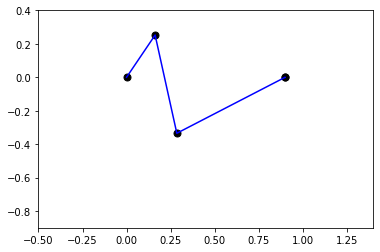

interactive(children=(FloatSlider(value=3.0, description='theta1num', max=7.0, step=0.2), Output()), _dom_clas…

In [38]:
theta1, theta2, theta3 = ttheta = sp.symbols("theta1:4")

def R(phi):
    """
    Rotationsmatrix in der Ebene
    """
    c = sp.cos(phi)
    s = sp.sin(phi)
       
    return  sp.Matrix([[c, -s], [s, c]])

R(theta1) # Rotationsmatirx

# Einheitvektor in x-Richtung
ex = sp.Matrix([1, 0]) 

# Längen der Glieder
l1, l2, l3, l4 = 0.3, 0.6, 0.7, 0.9

# Basis 1 und 2
B1 = sp.Matrix([0, 0])
B2 = sp.Matrix([l4, 0])

G1 = B1 + R(theta1)*ex*l1
G2 = G1 + R(theta1 + theta2)*ex*l2

# Ende der offenen Kette
EE = G2 + R(theta1 + theta2 + theta3)*ex*l3

# Kettenschlussbedingung (2 skalare Gleichungen)
constraints = sp.Matrix([EE - B2]) ##:

# Matrix aller Gelenke (kart. Koordinanten)
joints = sp.Matrix.hstack(B1, G1, G2, EE, B2)


# Umwandeln in aufrufbare Funktionen
c_func = sp.lambdify(ttheta, constraints, modules="numpy")
j_func = sp.lambdify(ttheta, joints, modules="numpy")


# Zielfunktion für Minimierung
def target(p, theta1):    
    # Fehler-Vektor:
    err = c_func(theta1, p[0], p[1])
    return err[0]**2 + err[1]**2
    

from scipy.optimize import fmin


# isolierter Test der Minimierung

# Startschätzung
ttheta0 = [0.25*np.pi, 0, 0] ##

res = fmin(target, x0=ttheta0[1:], args=(ttheta0[0], ))


# isolierter Test des Plottens

theta1num = 1
res = fmin(target, x0=[0, 0], args=(theta1num,), disp=0)

# das wird ein array mit shape=(2, 5)
jc = joint_coords = j_func(theta1num, *res)

plt.plot(jc[0, :], jc[1, :], "ok", ms=7)
plt.plot(jc[0, :], jc[1, :], "b-")

# plt.axis("equal")
plt.axis([-0.5, 1.4, -0.9, 0.4])


# Interaktion zwischen Optimierung und Gleichungslösung

from ipywidgets import interact

@interact(theta1num=(0, 7, 0.2)) # (min, max, step)
def plot_func(theta1num):
    res = fmin(target, x0=[0, 0], args=(theta1num,), disp=0)

    # das wird ein array mit shape=(2, 5)
    jc = joint_coords = j_func(theta1num, *res)

    plt.plot(jc[0, :], jc[1, :], "ok", ms=7)
    plt.plot(jc[0, :], jc[1, :], "b-")
    plt.axis("equal")
    plt.axis([-0.5, 1.4, -0.9, 0.4])